## Bayes Theorem

Describes the probability of an event based on the knowledge of the probabilities of other events.

$P(A|B) = \frac{P(B|A)*P(A)}{P(B)}$

An example, two machines makes spanners. 
Machine 1: 30 spanners / hr
Machine 2: 20 spanners / hr

1% of all spanners produced are defective. Of all defective spanners, 50% come from machine 1 and 50% from machine 2.

What is the probability that a spanner produced by machine 2 is defective.

50 spanners are produced / hr:

$\textit{P(machine1)}$ = 30/50 = 0.6

$\textit{P(machine2)}$ = 20/50 = 0.4

$\textit{P(defective)}$ = 1% = 0.01

$\textit{P(machine1|defective)}$ = 0.5

$\textit{P(machine2|defective)}$ = 0.5

We are looking for $\textit{P(defective|machine2)}$.

$\textit{P(defective|machine2)}=\frac{P(machine2|defective)*P(defective)}{P(machine2)}$

$\textit{P(defect|machine2)}=\frac{0.5*0.01}{0.4}=0.0125=1.25\%$

## Naïve Bayes Classifier

If you have two classes in a dataset and two independent variables. If you have a new data point that you want to classify, can use Naïve bayes to calculate the probabilty the new point is in class 1 or 2.

The one thing that needs to be specificed is a radius to determine similar data points to the new data point X. So when calculating P(X), you can calculate: $$P(X)=\frac{\textit{Points similar to X in class 1}}{\textit{Total number of observations in class 1}}$$

#### Why Naïve?

Because the theorum requires the independence assumption - often not correct and therefore naive. 

For example if you have two independent features, e.g. age and salary, you have to assume they are totally independent.

#### P(X)

This is the probability that the new data point has similar features to points in class 1 or class 2.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# import the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values
X.shape, y.shape

((400, 2), (400,))

In [3]:
# split into test and train
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [5]:
# Fitting the Naive Bayes to training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None)

In [6]:
# Predicting the test set results
y_pred = classifier.predict(X_test)
# Making the confusion matrix to evaluate performace
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[64,  4],
       [ 5, 27]])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


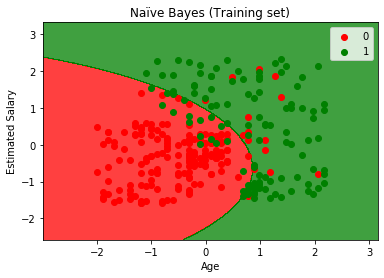

In [7]:
# visualise training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naïve Bayes (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show();

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


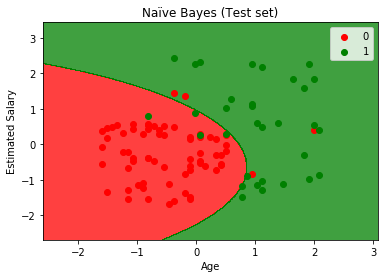

In [8]:
# visualise test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naïve Bayes (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show();